In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils

# Read data
df = pd.read_csv('./Data/Gas_Trade_Flows_IEA_202310 - Data.csv')
df.head()

,Borderpoint,Exit,Unnamed: 2,Entry,MAXFLOW (Mm3/h),Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,-->,Italy,1.10,0,0,0,0,0,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,-->,Spain,1.07,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,-->,France,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,-->,Belgium,0.37,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,-->,Spain,0.30,0,0,0,0,12,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


### Process data

In [2]:
# Drop the unnamed column
df = df.drop(columns=['Unnamed: 2'])
df.head()

,Borderpoint,Exit,Entry,MAXFLOW (Mm3/h),Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,Mar-09,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,Italy,1.10,0,0,0,0,0,0,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,Spain,1.07,0,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,France,NaN,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,Belgium,0.37,0,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,Spain,0.30,0,0,0,0,12,2,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


In [3]:
# Create a copy of the dataframe and call it country_aggregated_df
country_aggregated_df = df.copy()
country_aggregated_df.head()

,Borderpoint,Exit,Entry,MAXFLOW (Mm3/h),Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,Mar-09,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,Italy,1.10,0,0,0,0,0,0,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,Spain,1.07,0,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,France,NaN,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,Belgium,0.37,0,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,Spain,0.30,0,0,0,0,12,2,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


In [4]:
country_aggregated_df.shape

(228, 185)

In [5]:
unique_countries = set(country_aggregated_df['Exit'].unique()) | set(country_aggregated_df['Entry'].unique())

print("Data contains {} unique countries".format(len(unique_countries)))
print(unique_countries)


Data contains 45 unique countries
{'Morocco', 'United Kingdom', 'Russia', 'North Macedonia', 'Tunisia', 'Belarus', 'Republic of Türkiye', 'Latvia', 'Lithuania', 'Algeria', 'Georgia', 'Denmark', 'Spain', 'Iran', 'Albania', 'Italy', 'Norway', 'Ireland', 'Belgium', 'Liquefied Natural Gas', 'Croatia', 'Estonia', 'Slovak Republic', 'Not Elsewhere Specified', 'Portugal', 'Moldova', 'Serbia', 'Slovenia', 'Sweden', 'Netherlands', 'Greece', 'France', 'Austria', 'Switzerland', 'Finland', 'Germany', 'Bulgaria', 'Romania', 'Ukraine', 'Libya', 'Hungary', 'Czech Republic', 'Luxembourg', 'Poland', 'Isle of Man'}


In [6]:
# Retrieve columns with flow data 
mm_yyyy = df.iloc[:, df.columns.get_loc('Oct-08'):]

Text(0.5, 1.0, 'Heatmap of NaN values')

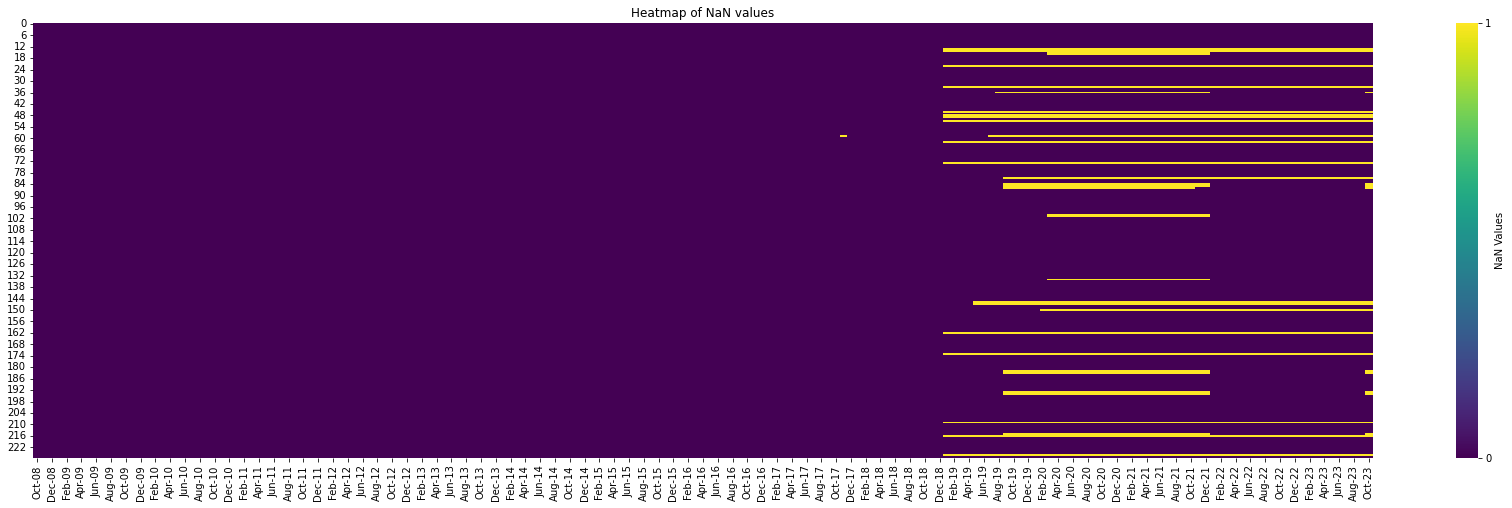

In [7]:
# Heatmap of NaN values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy.isnull(), cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': 'NaN Values'})
plt.title("Heatmap of NaN values")


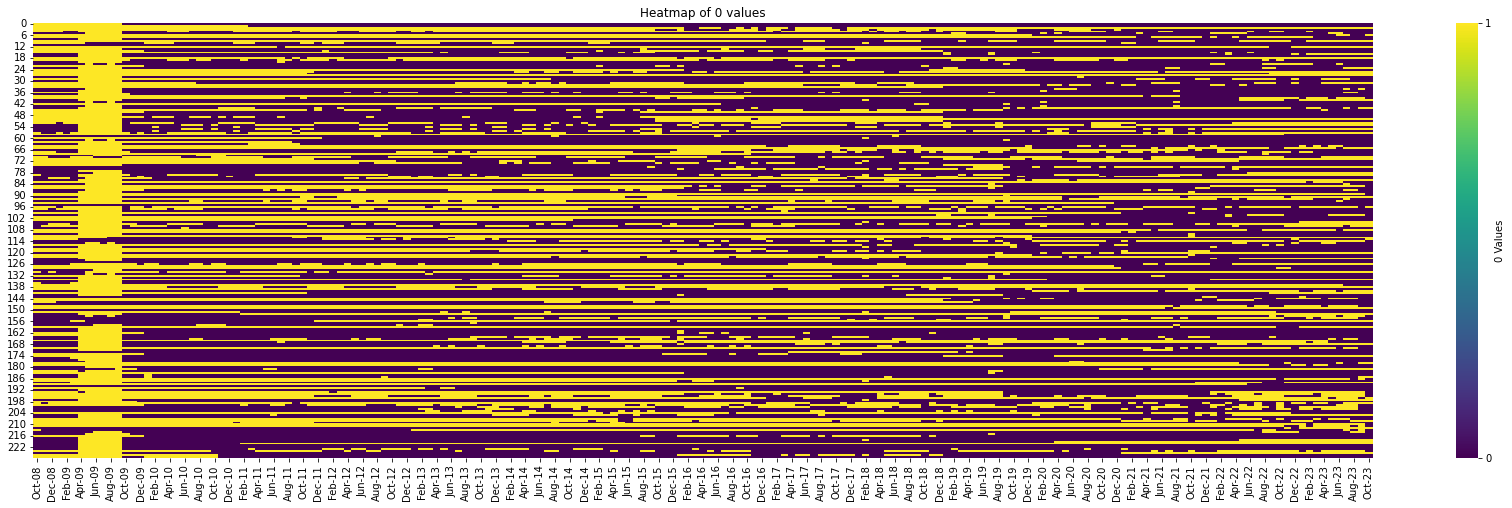

In [8]:
# Heatmap of 0 values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy == 0, cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': '0 Values'})
plt.title("Heatmap of 0 values")
plt.show()

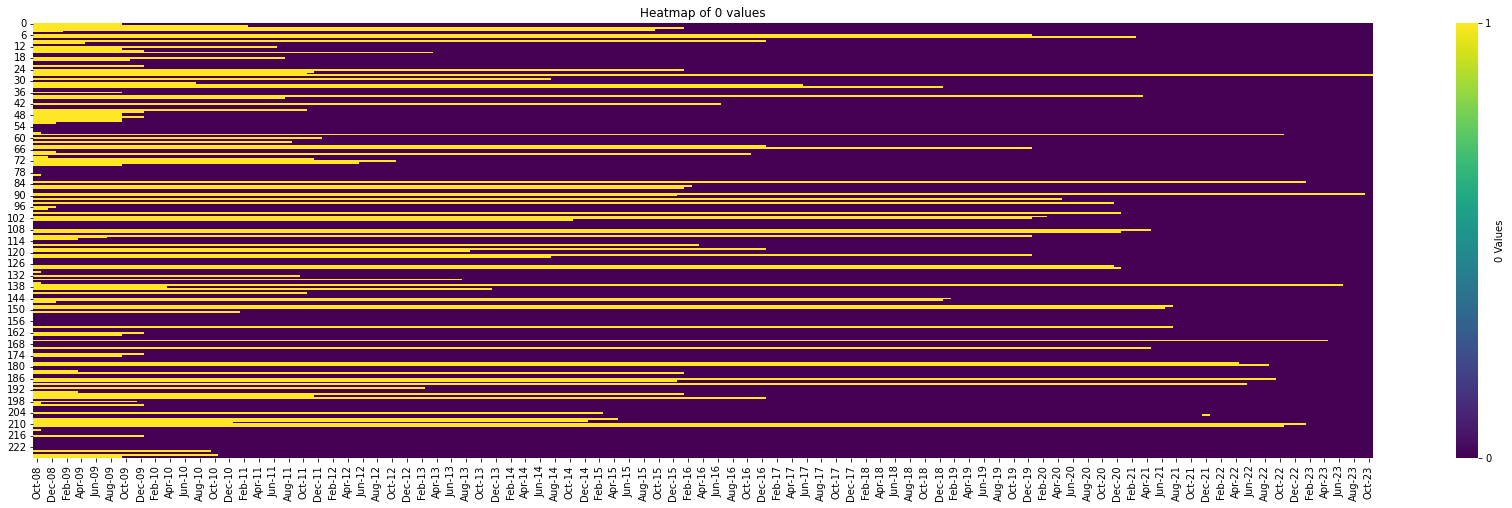

In [9]:
# If a pipeline is observed with non-zero flow at some point in time, we 'keep' the pipeline in the grid for subsequent periods (regardless of whether the flow is zero or not)

mm_yyyy_copy = mm_yyyy.copy()
for index, row in mm_yyyy_copy.iterrows():
    seen_nonzero = False
    for col in mm_yyyy_copy.columns:
        if row[col] == 0:
            if not seen_nonzero:
                mm_yyyy_copy.at[index, col] = -1
        else:
            seen_nonzero = True

# Heatmap of 0 values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy_copy == -1, cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': '0 Values'})
plt.title("Heatmap of 0 values")
plt.show()

### Create graph objects of grid per MM-YYYY

In [10]:
graphs = utils.create_graphs_from_dataset(country_aggregated_df)

### Development of borderpoints

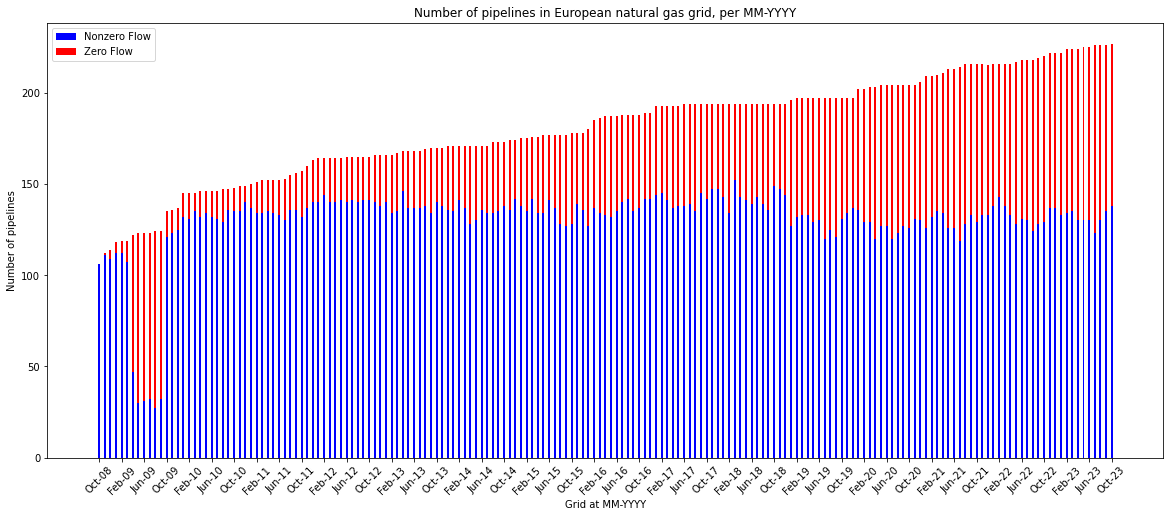

In [11]:
""" 
NOTE:
If a pipeline is observed with non-zero flow at some point in time, we 'keep' the pipeline 
in the grid for subsequent periods (regardless of whether the flow is zero or not)
"""

edge_counts_nonzero, edge_counts_zero = [sum(1 for edge in G.edges if G.edges[edge]['flow'] != 0) for G in graphs], [sum(1 for edge in G.edges if G.edges[edge]['flow'] == 0) for G in graphs]

plt.figure(figsize=(20, 8))
bar_width = 0.35

plt.bar(mm_yyyy.columns, edge_counts_nonzero, width=bar_width, label='Nonzero Flow', color='blue')
plt.bar(mm_yyyy.columns, edge_counts_zero, width=bar_width, label='Zero Flow', bottom=edge_counts_nonzero, color='red')
plt.xlabel('Grid at MM-YYYY')
plt.ylabel('Number of pipelines')
plt.title('Number of pipelines in European natural gas grid, per MM-YYYY')
plt.legend()
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45)

plt.show()


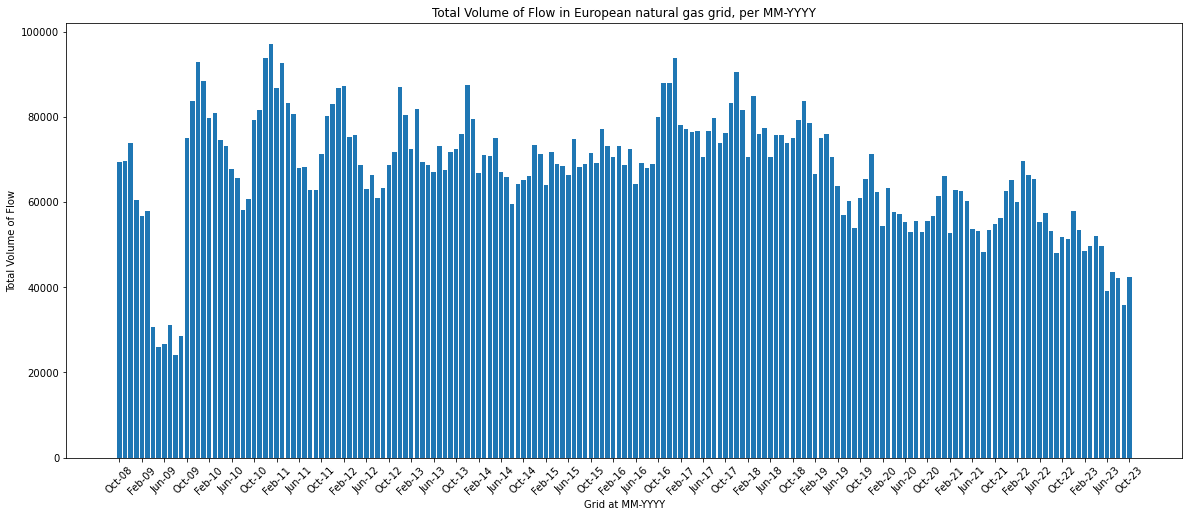

In [12]:
total_flow = mm_yyyy.sum()
plt.figure(figsize=(20, 8))
plt.bar(total_flow.index, total_flow.values)
plt.xlabel('Grid at MM-YYYY')
plt.ylabel('Total Volume of Flow')
plt.title('Total Volume of Flow in European natural gas grid, per MM-YYYY')
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45)
plt.show()


<Figure size 2880x1440 with 0 Axes>

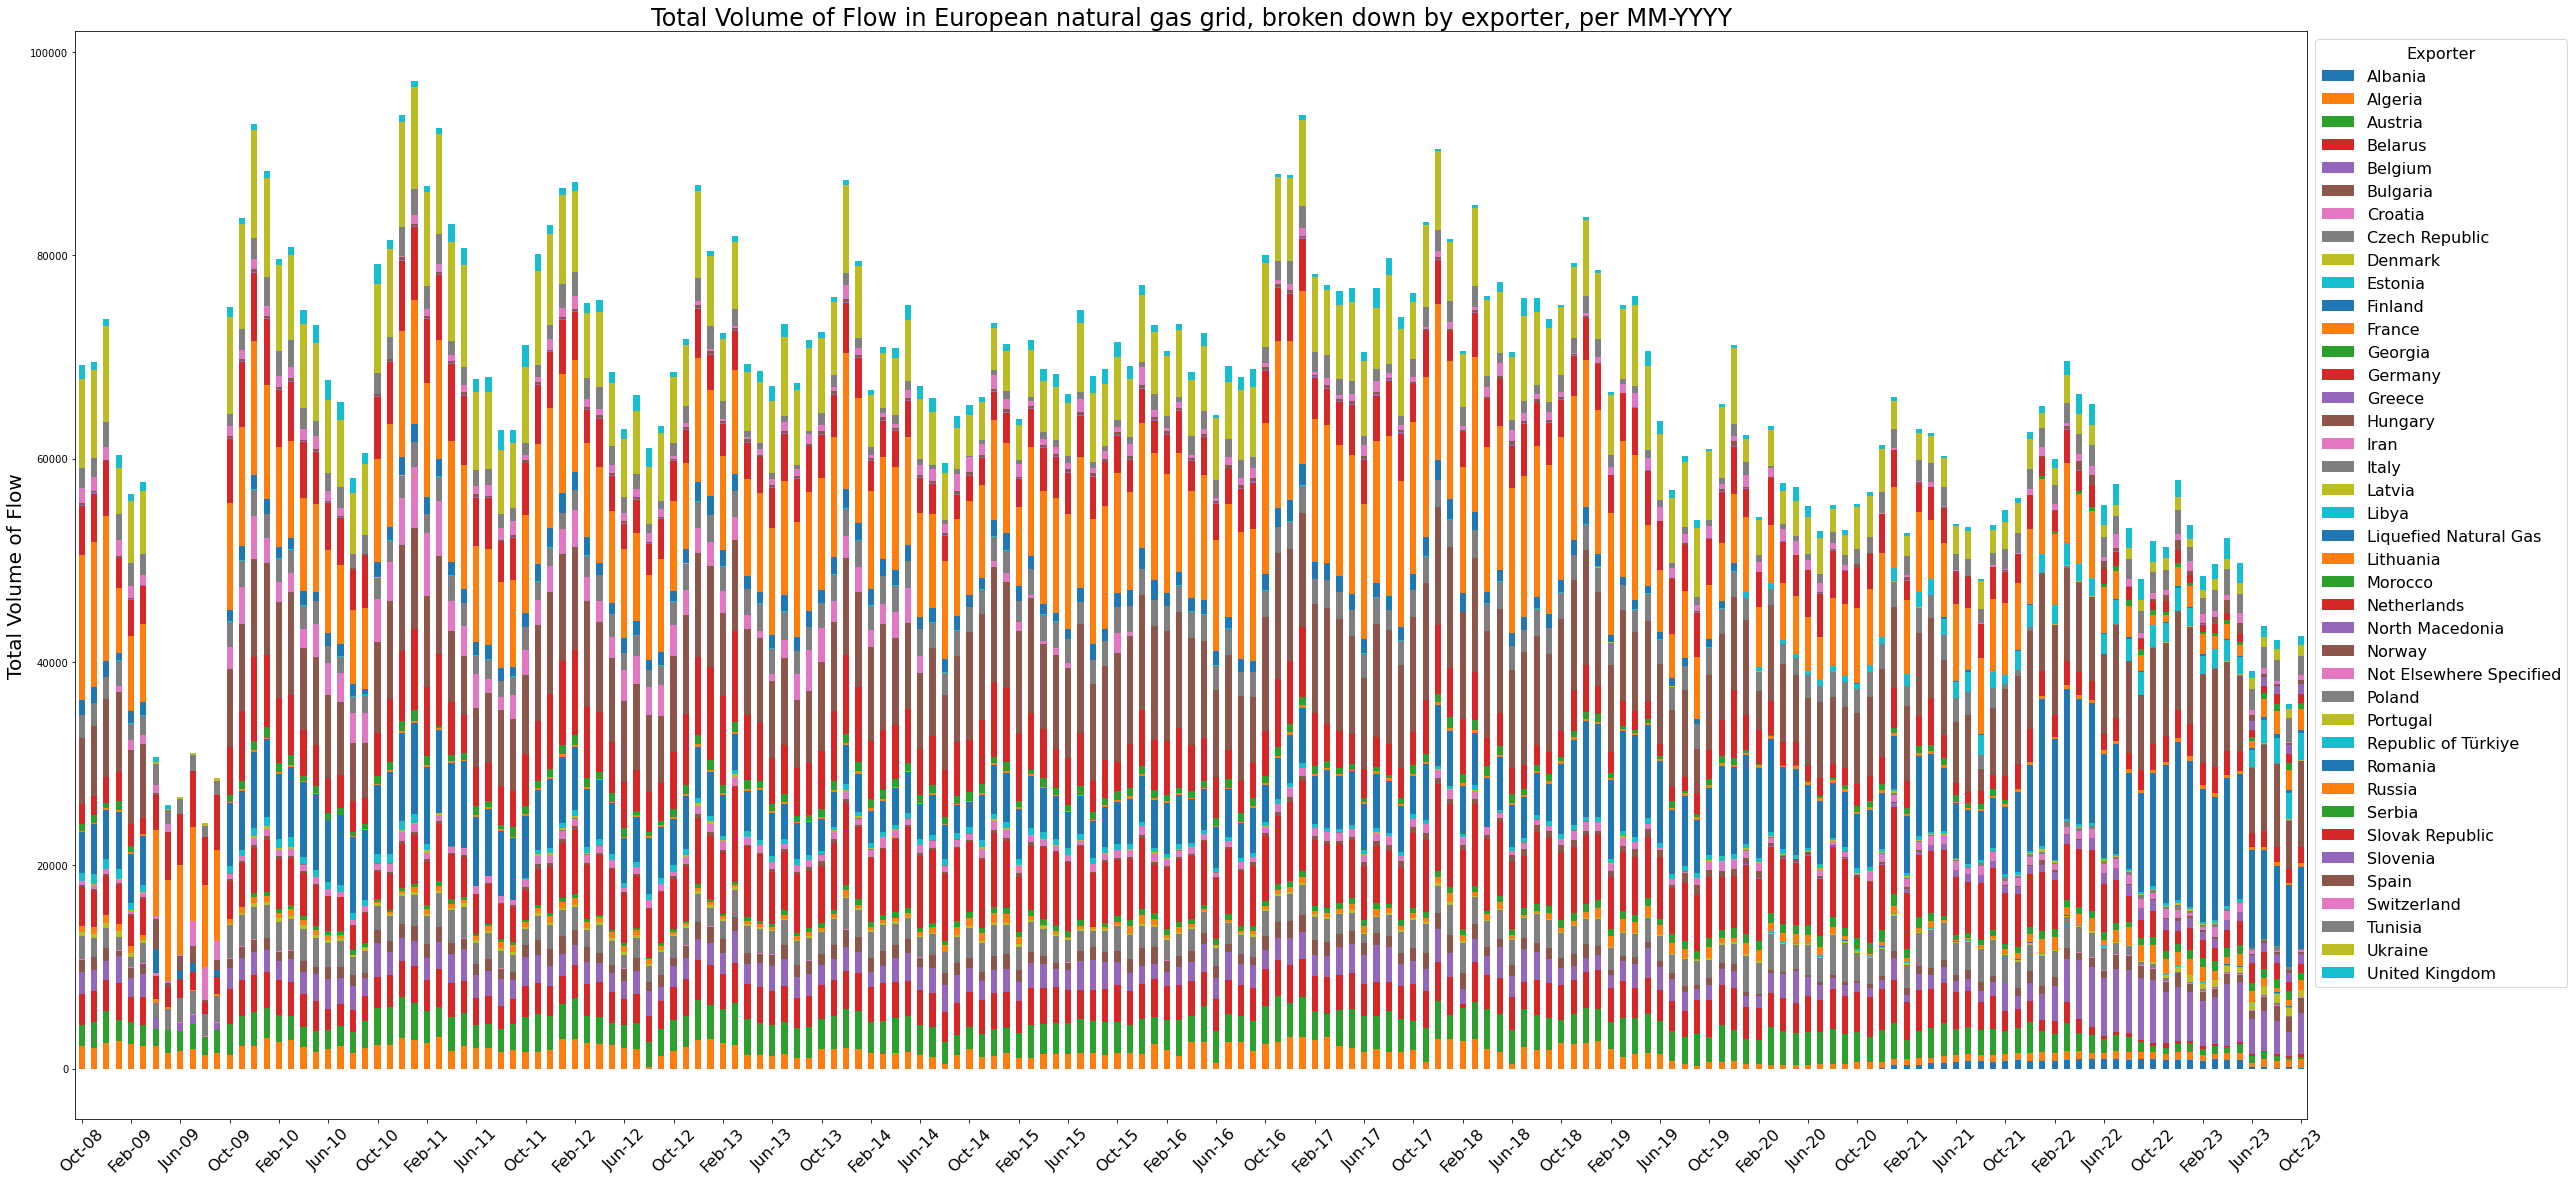

In [35]:
total_export_by_country = country_aggregated_df.groupby('Exit').sum().reset_index().set_index('Exit')
flow_columns = total_export_by_country.columns[total_export_by_country.columns.get_loc('Oct-08'):]
plt.figure(figsize=(40, 20))
total_export_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Total Volume of Flow in European natural gas grid, broken down by exporter, per MM-YYYY', fontsize=24)
plt.ylabel('Total Volume of Flow', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=16)
plt.legend(title='Exporter', loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title_fontsize=16)
plt.show()


<Figure size 2880x1440 with 0 Axes>

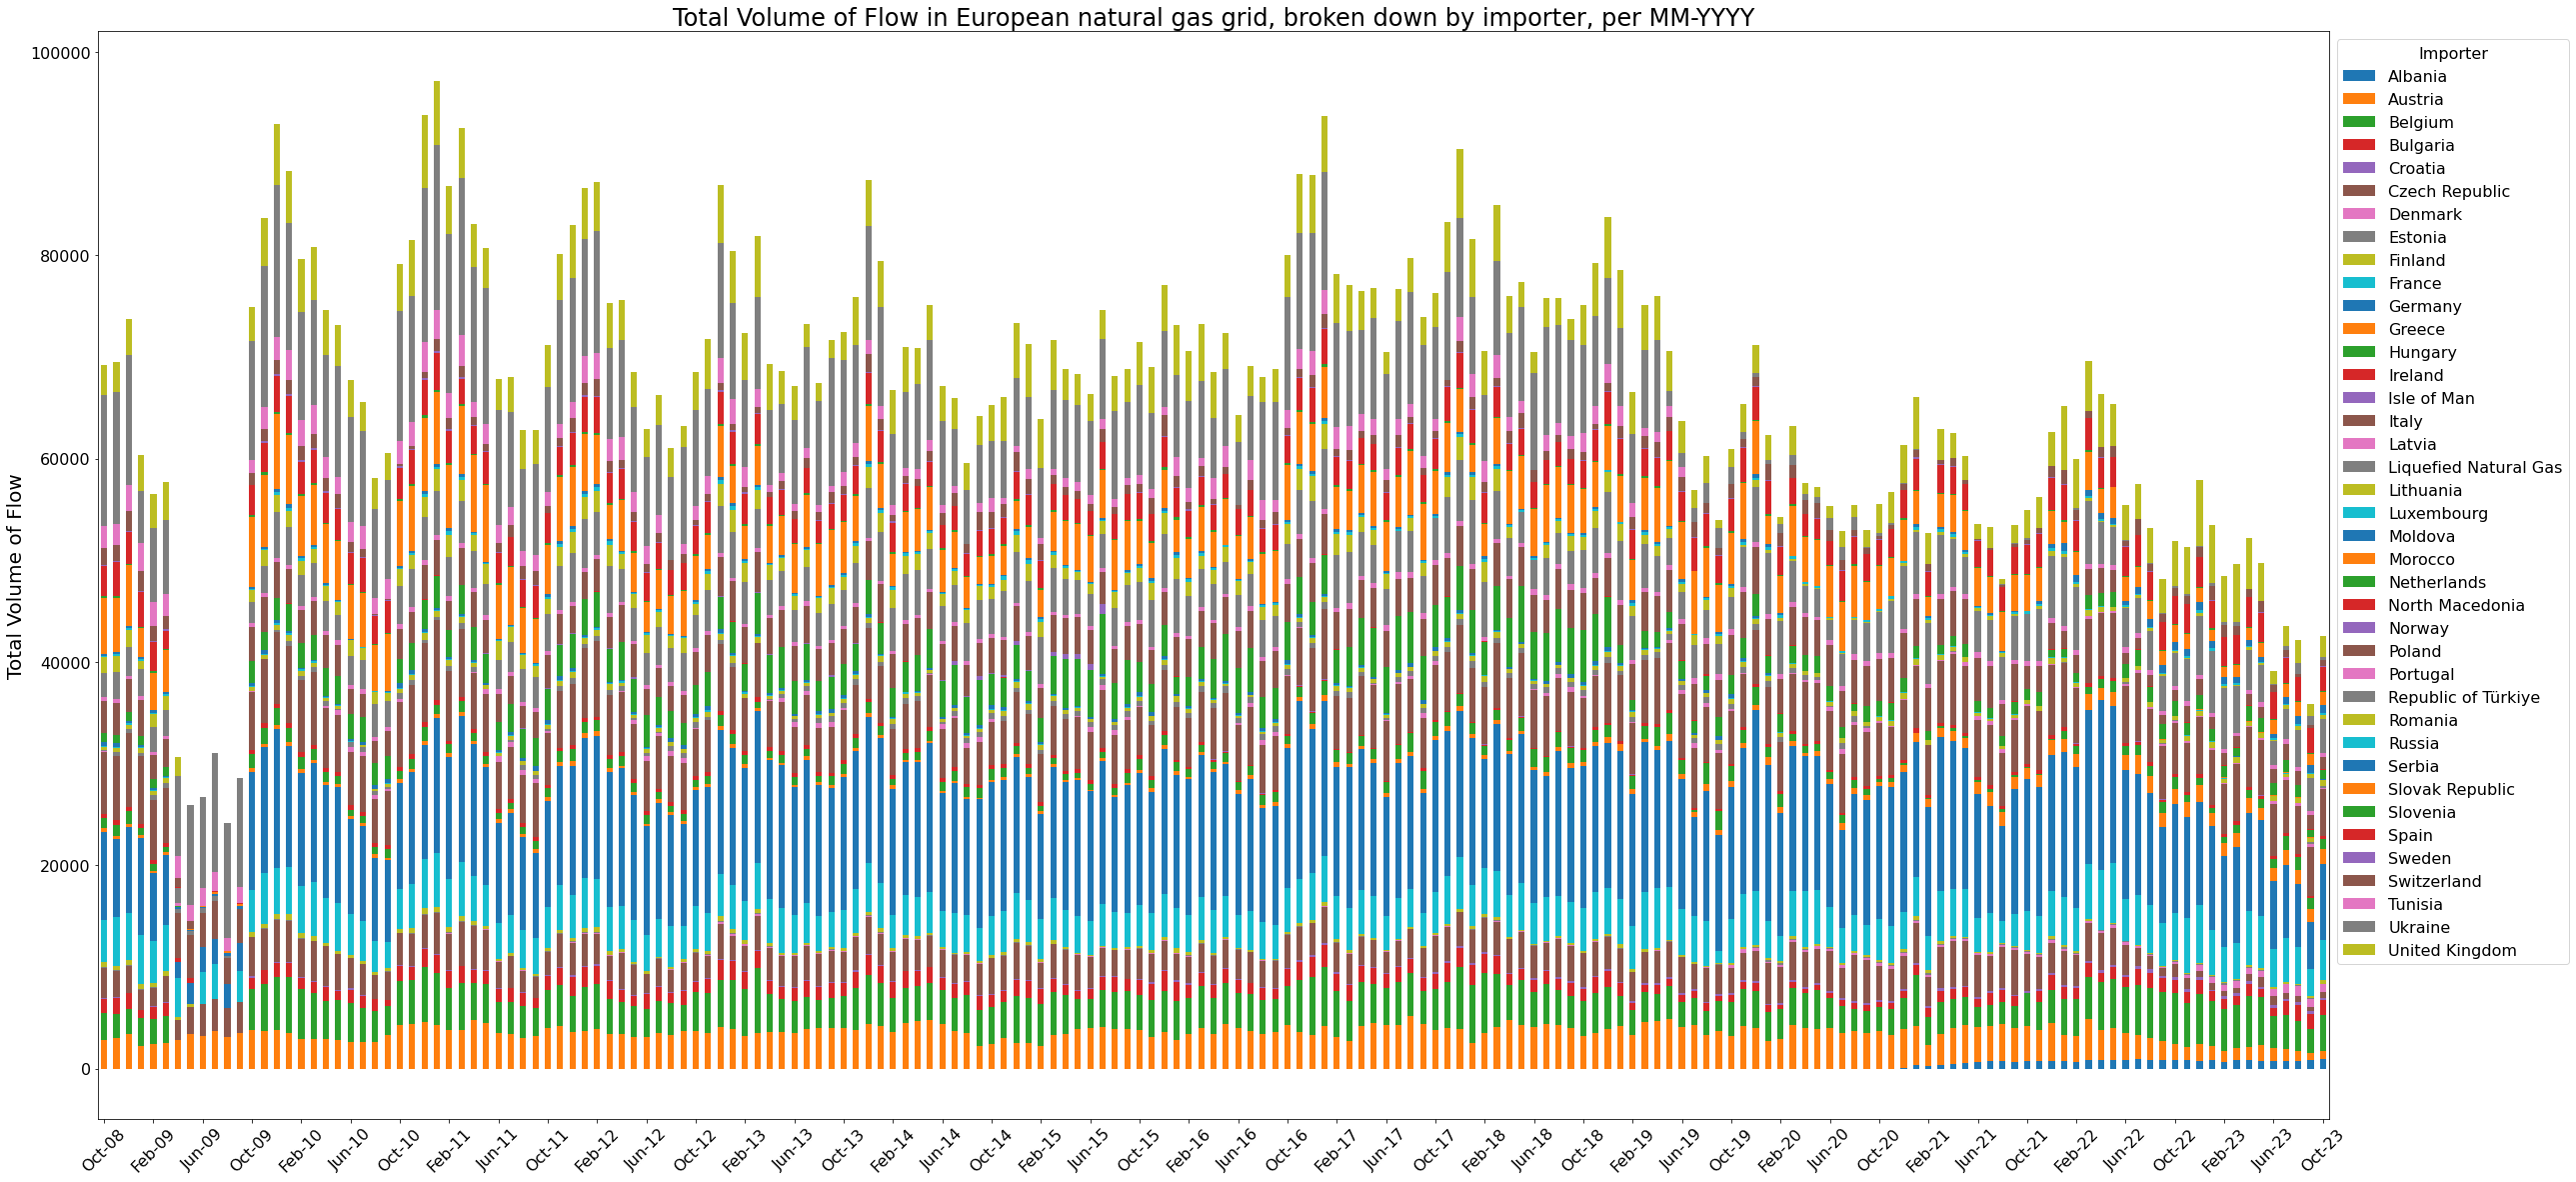

In [36]:
total_import_by_country = country_aggregated_df.groupby('Entry').sum().reset_index().set_index('Entry')
flow_columns = total_import_by_country.columns[total_import_by_country.columns.get_loc('Oct-08'):]
plt.figure(figsize=(40, 20))
ax = total_import_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Total Volume of Flow in European natural gas grid, broken down by importer, per MM-YYYY', fontsize=24)
plt.ylabel('Total Volume of Flow', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Importer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title_fontsize=16)
plt.show()


<Figure size 2880x1440 with 0 Axes>

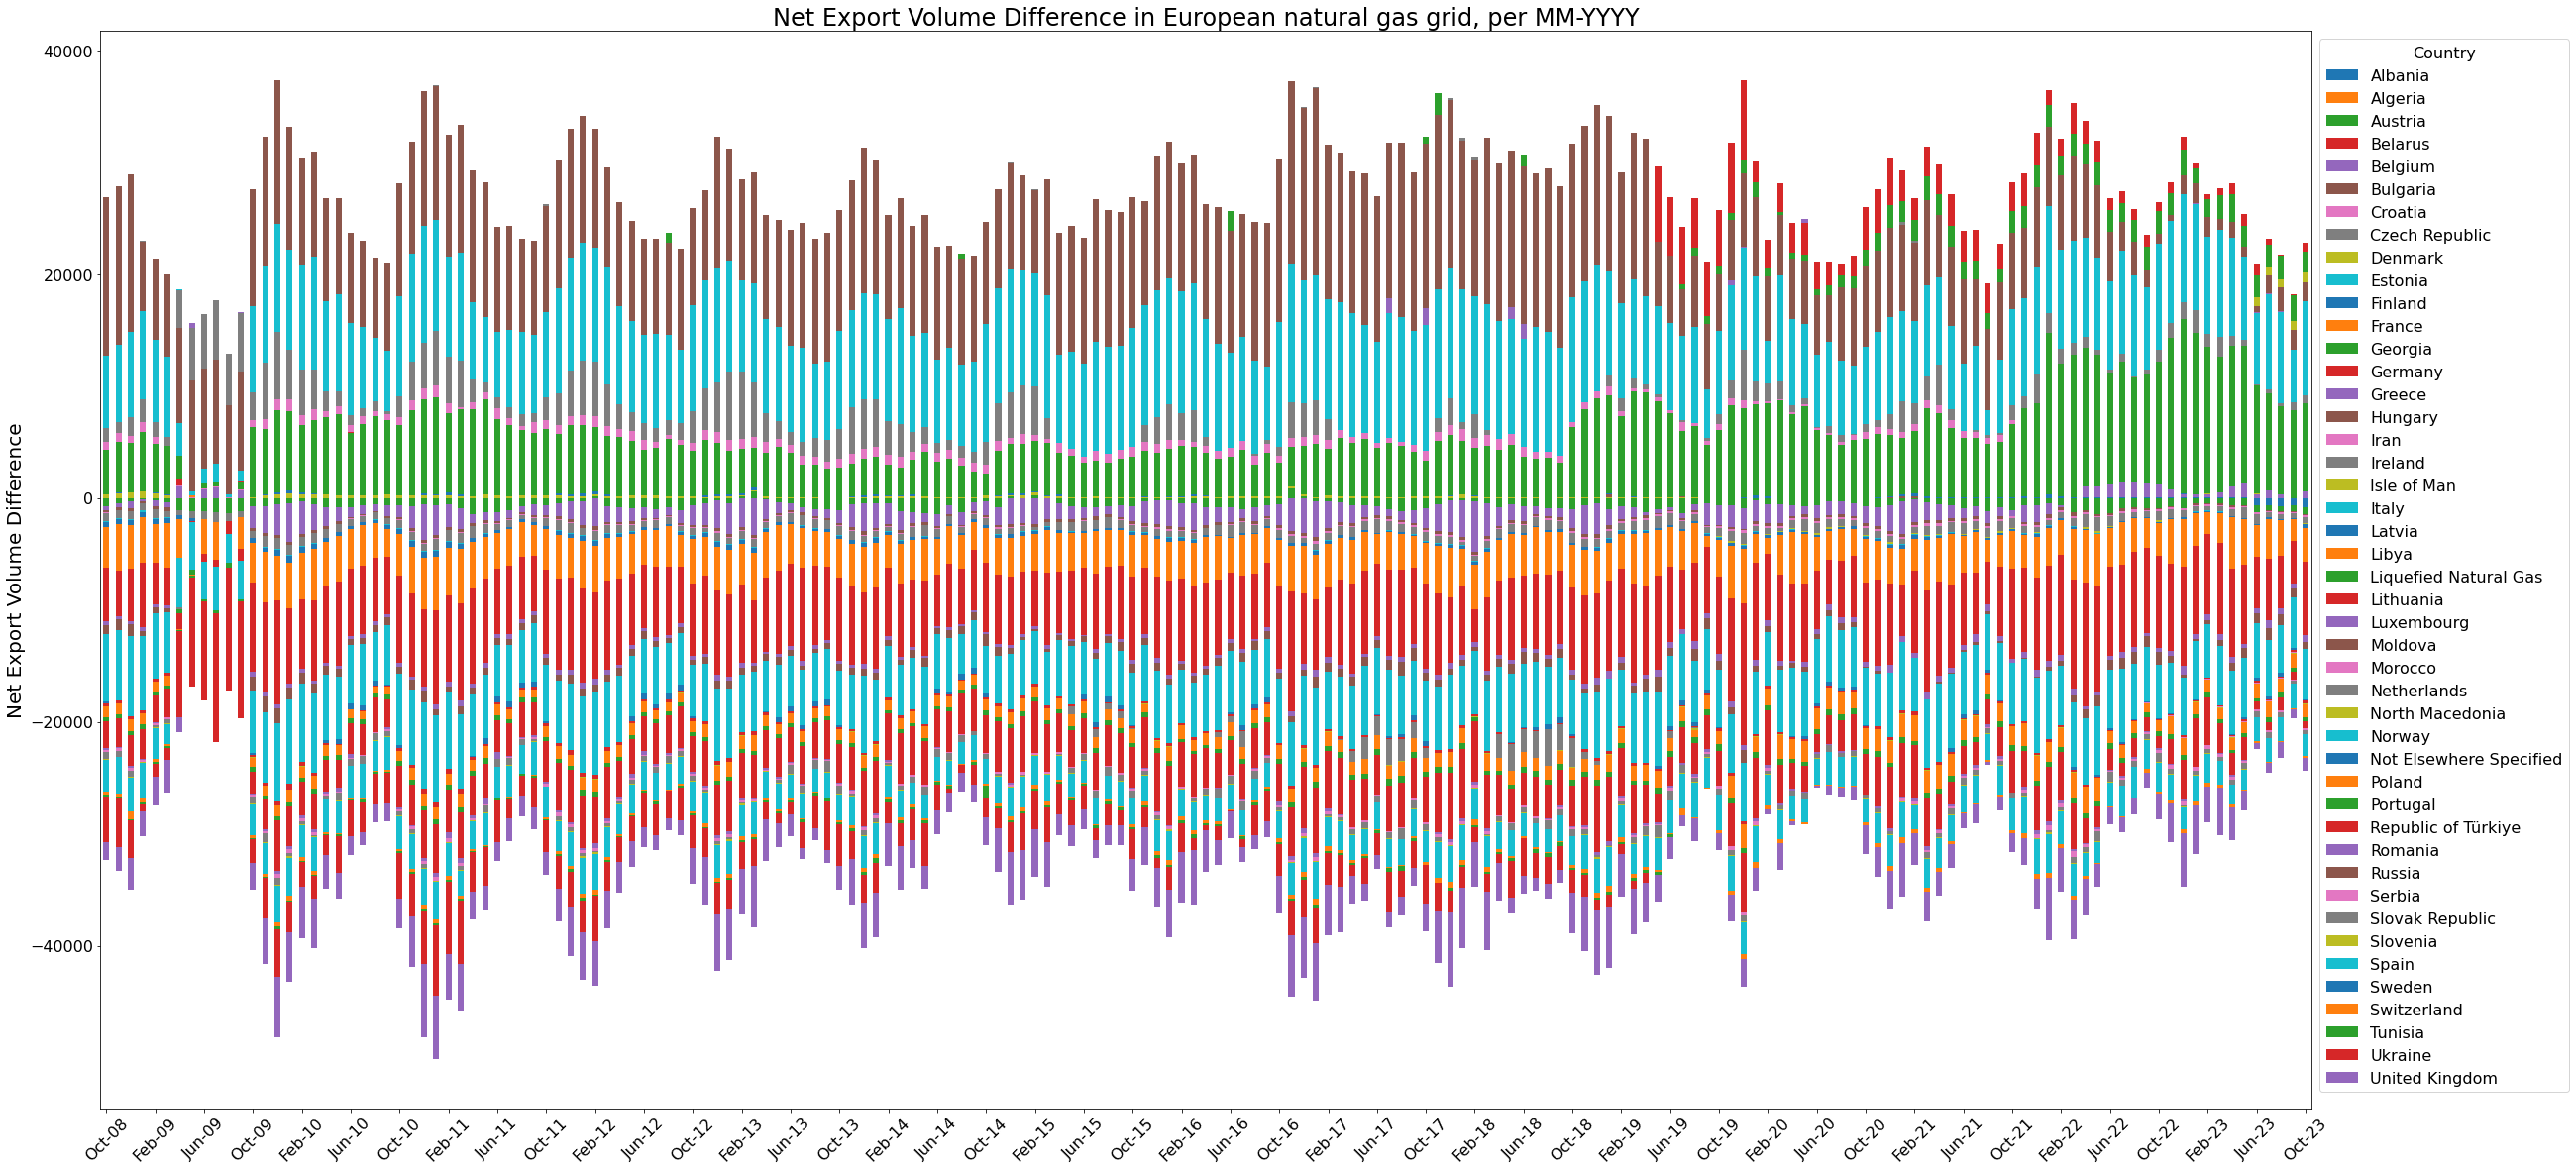

In [39]:
net_export_by_country = total_export_by_country[flow_columns] - total_import_by_country[flow_columns]
plt.figure(figsize=(40, 20))
ax = net_export_by_country.T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Net Export Volume Difference in European natural gas grid, per MM-YYYY', fontsize=24)
plt.ylabel('Net Export Volume Difference', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), fontsize=16, title_fontsize=16)
plt.show()